In [1]:
from chinese_whispers import __version__ as cw_version
from networkx import __version__ as nx_version
print('Chinese Whispers {0}'.format(cw_version))
print('NetworkX {0}'.format(nx_version))

Chinese Whispers 0.6
NetworkX 2.3


# Chinese Whispers Clustering

In [2]:
import networkx as nx
from chinese_whispers import chinese_whispers, aggregate_clusters

In [3]:
G = nx.karate_club_graph()

In [4]:
# Perform clustering of G, parameters weighting and seed can be omitted
chinese_whispers(G, weighting='top', seed=1337) 

# Print the clusters in the descending order of size
print('Cluster ID\tCluster Elements\n')

for label, cluster in sorted(aggregate_clusters(G).items(), key=lambda e: len(e[1]), reverse=True):
    print('{}\t{}\n'.format(label, cluster))

Cluster ID	Cluster Elements

34	{32, 33, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}

1	{0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}



# Visualization with NetworkX

In [5]:
import matplotlib.pyplot as plt

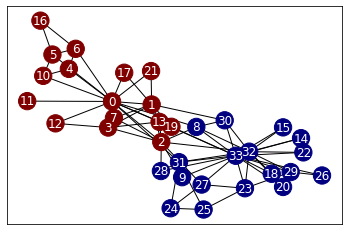

In [6]:
colors = [1. / G.nodes[node]['label'] for node in G.nodes()]

nx.draw_networkx(G, cmap=plt.get_cmap('jet'), node_color=colors, font_color='white')